# MINISTÉRIO DO TRABALHO


PDET
PROGRAMA DE DISSEMINAÇÃO DAS ESTATÍSTICAS DO TRABALHO

Apresentação

O Programa de Disseminação das Estatísticas do Trabalho (PDET) tem por objetivo divulgar informações oriundas de dois Registros Administrativos, RAIS - Relação Anual de Informações Sociais - e CAGED - Cadastro Geral de Empregados e Desempregados, à sociedade civil.

Por meio desse Programa, o Ministério da Economia vem procurando disseminar informações cada vez mais abrangentes sobre o mercado de trabalho, utilizando diferentes tipos de mídia e atingindo, assim, diferentes grupos de usuários.

Histórico

Devido à crescente demanda por dados conjunturais do mercado de trabalho e a necessidade do Ministério da Economia, de contar com estatísticas mais completas, mais consistentes e mais ágeis, foram implementadas expressivas alterações ao sistema CAGED. Como decorrência dos substanciais avanços, foram construídos, a partir de 1983, o índice mensal de emprego, a taxa de rotatividade e a flutuação da mão-de-obra (admitidos / desligados).

Os aperfeiçoamentos ocorridos no sistema CAGED e também na metodologia de tratamento dos dados tornaram esse registro administrativo uma das principais fontes de informações estatísticas sobre o mercado de trabalho conjuntural. O CAGED apresenta desagregações idênticas às da RAIS - Relação Anual de Informações Sociais, em termos geográficos, setoriais e ocupacionais, possibilitando a realização de estudos que indicam as tendências mais atuais. No aspecto conjuntural, é a única fonte de informação com nível de desagregação municipal, sendo, portanto, imprescindível à elaboração de diagnósticos acerca das políticas públicas de emprego, como também, no monitoramento sobre implantação de programas sociais do governo.

## Instalação de Pacotes
### Importação de Bibliotecas

In [ ]:
%%capture

# Leitura, manipulação, e analise exploratoria dos dados
import seaborn as sns
from google.colab import drive
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from calendar import month_name

#Tabelas e Gráficos

import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")


### Conectando ao Google drive (acesso ao banco de dados)

In [ ]:
%%capture
drive.mount('/content/drive')

### Leitura do banco de dados

In [ ]:
# Caminho do arquivo no Google Drive

file_path = '/content/drive/Shareddrives/Dados/Caged/caged_mensal.xlsx'

caged = pd.read_excel(file_path, engine='openpyxl')
caged


,periodo,variavel,Mg-Congonhas,Mg-Itabirito,Mg-Mariana,Mg-Ouro Branco,Mg-Ouro Preto
0,Janeiro/2020,Estoque,13349.000000,13812.000000,15482.000000,11401.000000,15190.00000
1,Janeiro/2020,Admissões,551.000000,691.000000,1273.000000,575.000000,847.00000
2,Janeiro/2020,Desligamentos,355.000000,575.000000,826.000000,504.000000,533.00000
3,Janeiro/2020,Saldos,196.000000,116.000000,447.000000,71.000000,314.00000
4,Fevereiro/2020,Estoque,13696.000000,14029.000000,16132.000000,11439.000000,15712.00000
...,...,...,...,...,...,...,...
219,Setembro/2023,Estoque,17400.000000,20013.000000,18158.000000,14528.000000,18850.00000
220,Setembro/2023,Admissões,802.000000,1119.000000,802.000000,650.000000,1033.00000
221,Setembro/2023,Desligamentos,601.000000,940.000000,904.000000,532.000000,850.00000
222,Setembro/2023,Saldos,201.000000,179.000000,-102.000000,118.000000,183.00000


In [ ]:
%%capture

# Mapear nomes dos meses em português para números
meses_dict = {
    'Janeiro': '01',
    'Fevereiro': '02',
    'Março': '03',
    'Abril': '04',
    'Maio': '05',
    'Junho': '06',
    'Julho': '07',
    'Agosto': '08',
    'Setembro': '09',
    'Outubro': '10',
    'Novembro': '11',
    'Dezembro': '12'
}

# Filtrar a variável 'estoque' no DataFrame 'caged'
variaveis = ["Estoque", "Estoque*** (Estoque de referência de 2022)"]
emprego_estoque = caged[caged['variavel'].isin(variaveis)]

# Dividir a coluna 'periodo' para extrair o mês e o ano
emprego_estoque['mes'], emprego_estoque['ano'] = emprego_estoque['periodo'].str.split('/', 1).str

# Mapear o nome do mês para o número correspondente no dicionário meses_dict
emprego_estoque['mes_numero'] = emprego_estoque['mes'].map(meses_dict)

# Criar a coluna 'data' combinando o ano e o mês
emprego_estoque['data'] = pd.to_datetime(emprego_estoque['ano'] + '-' + emprego_estoque['mes_numero'], format='%Y-%m', errors='coerce')
emprego_estoque

# Introdução

No mês de setembro, observamos um aumento no número de empregos formais, com 1.033 novas contratações e 850 demissões, resultando em um aumento de 0,98% em relação ao mês anterior. De acordo com os dados mais recentes divulgados pelo CAGED, o estoque de empregos subiu de 18.667 em agosto para 18.850 em setembro, o que representa um aumento de 183 postos de trabalho ao longo do mês de setembro de 2023.

---


## Estoque de Trabalho - CAGED

Nesta primeira parte apresentamos o estoque de trabalho de Ouro Preto, a partir dos dados do Novo CAGED. Importante destacar que, estoque é a quantidade total de vínculos formais (regido pela CLT) ativos. ^[Ministério do Trabalho e Previdência, 2023.]

O gráfico abaixo ilustra 	a trajetória do estoque de trabalho  no município de Ouro	Preto, no período de janeiro de 2020 a setembro de 2023. Ao comparar o estoque de trabalho em setembro de 2022 (17.257), com o estoque atual em setembro deste ano (18.850), fica evidente um crescimento significativo de 9.23%. Esses dados destacam o aumento substancial do número de vínculos formais no mercado de	trabalho.

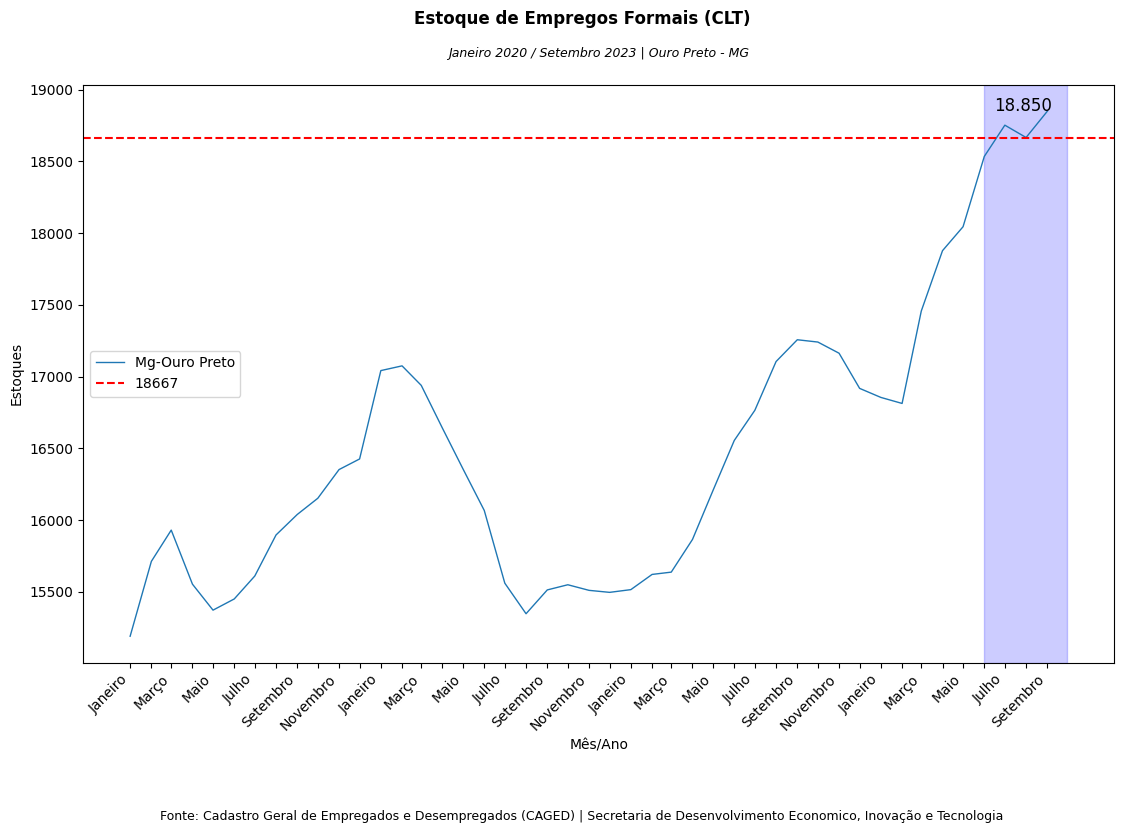

In [ ]:
# Gráfico Estoque de Empregos Formais CLT

# Ajuste as datas para corresponder à coluna 'data' do DataFrame real
emprego_estoque['data'] = pd.to_datetime(emprego_estoque['data'])

# A função para filtrar os rótulos
def filtro_dois_em_dois(lista):
    return [label if i % 2 == 0 else '' for i, label in enumerate(lista)]

# Gráfico de linha
plt.figure(figsize=(13.3, 7.5))

plt.plot(emprego_estoque['data'], emprego_estoque['Mg-Ouro Preto'], linewidth=1)

plt.axhline(y=18667, color='red', linestyle='--')

plt.axvspan(pd.to_datetime('2023-06-01'), pd.to_datetime('2023-09-30'), color='blue', alpha=0.2)

plt.text(pd.to_datetime('2023-06-15'), 18850, '18.850', color='black', size=12)

# Ajustar os ticks do eixo x para exibir os nomes dos meses a cada 2 meses
ticks = filtro_dois_em_dois(emprego_estoque['mes'])
plt.xticks(emprego_estoque['data'], ticks, rotation=45, ha='right')

# Ajustes no título, subtítulo, legenda
plt.suptitle("Estoque de Empregos Formais (CLT)", ha='center', fontsize=12, fontweight='bold')
plt.title("Janeiro 2020 / Setembro 2023 | Ouro Preto - MG", ha='center', fontsize=9, style='italic', pad=20)
plt.figtext(0.5, -0.1, 'Fonte: Cadastro Geral de Empregados e Desempregados (CAGED) | Secretaria de Desenvolvimento Economico, Inovação e Tecnologia', ha='center', fontsize=9)
plt.xlabel('Mês/Ano')
plt.ylabel('Estoques')

plt.legend(['Mg-Ouro Preto', '18667'])
plt.show()


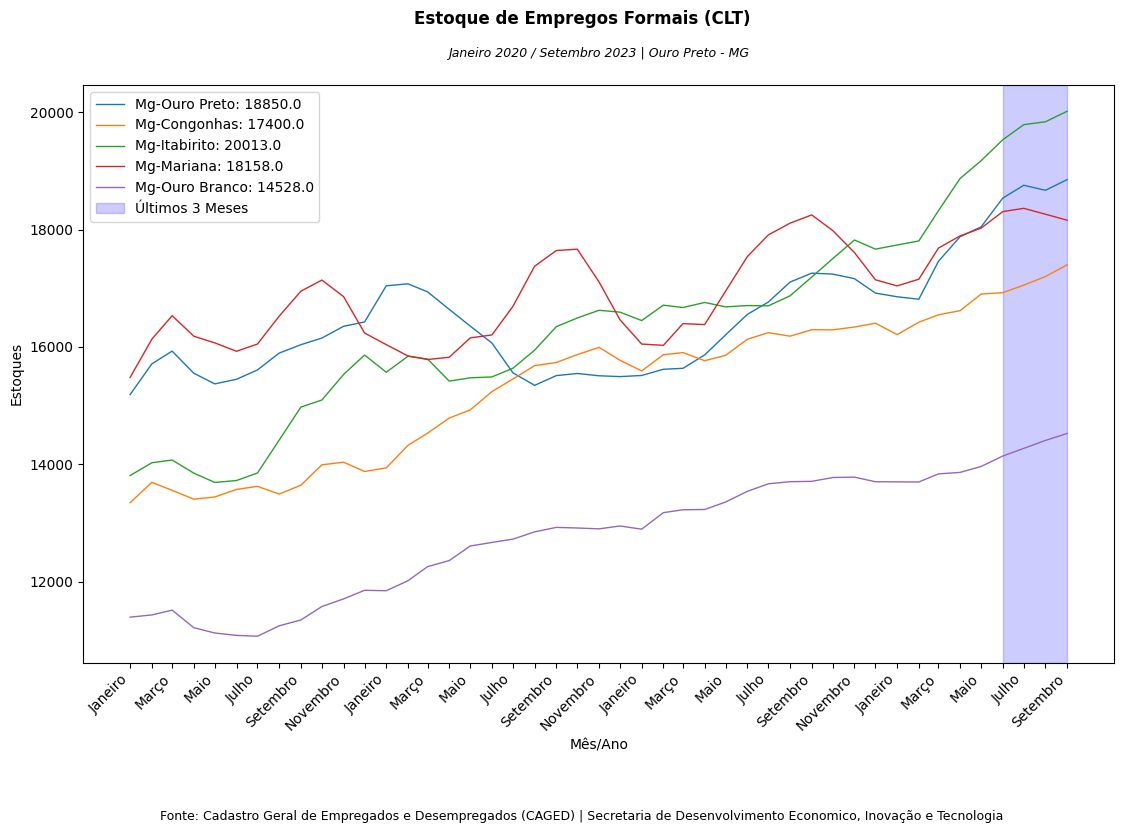

In [ ]:
# Gráfico Estoque de Empregos Formais CLT Região dos Inconfidentes

plt.figure(figsize=(13.3, 7.5))
plt.plot(emprego_estoque['data'], emprego_estoque[['Mg-Ouro Preto', 'Mg-Congonhas', 'Mg-Itabirito', 'Mg-Mariana', 'Mg-Ouro Branco']], linewidth=1)
plt.axvspan(pd.to_datetime('2023-06-01'), pd.to_datetime('2023-09-01'), color='blue', alpha=0.2)

# Ajustar o eixo x para exibir os nomes dos meses a cada 2 meses
ticks = filtro_dois_em_dois(emprego_estoque['mes'])
plt.xticks(emprego_estoque['data'], ticks, rotation=45, ha='right')

# Lista para armazenar os rótulos da legenda
legend_labels = []

# Adicionar legendas para o último valor de cada cidade
for cidade in ['Mg-Ouro Preto', 'Mg-Congonhas', 'Mg-Itabirito', 'Mg-Mariana', 'Mg-Ouro Branco']:
    ultimo_valor_cidade = emprego_estoque[cidade].iloc[-1]
    # Adicionar à lista para a legenda
    legend_labels.append(f'{cidade}: {ultimo_valor_cidade}')

# Adicionar a legenda com os rótulos
plt.legend(legend_labels + ['Últimos 3 Meses'], loc='upper left')

# Ajustes no título, subtítulo, legenda
plt.suptitle("Estoque de Empregos Formais (CLT)", ha='center', fontsize=12, fontweight='bold')
plt.title("Janeiro 2020 / Setembro 2023 | Ouro Preto - MG", ha='center', fontsize=9, style='italic', pad=20)
plt.figtext(0.5, -0.1, 'Fonte: Cadastro Geral de Empregados e Desempregados (CAGED) | Secretaria de Desenvolvimento Economico, Inovação e Tecnologia', ha='center', fontsize=9)
plt.xlabel('Mês/Ano')
plt.ylabel('Estoques')
plt.show()


## Saldo

Na seção anterior, foi apresentado o estoque de trabalho, efetivamente o número de pessoas empregadas sob regime de CLT no município de Ouro Preto. Nesta parte, apresentaremos o saldo, isto é, a diferença entre o número de contratados e desligados.

Formalmente, temos que saldo é a diferença entre o número de contratados menos os desligados num determinado período. Por exemplo, se numa economia, no mês de agosto, foram contratados 100 pessoas e desligadas 60, o saldo é 100–60 = 40. Ou ainda, se numa economia foram contratados 150 pessoas, num outro mês qualquer, tendo sido desligadas 180, o saldo será negativo: 150–180 = -30.

No primeiro caso, dêmos um exemplo na qual a economia teve saldo positivo (houve mais contratações do que desligamentos). Já no segundo, dêmos um exemplo onde o número de desligamentos é superior ao de contratados.
Os gráficos abaixo ilustram essas ocorrências para o mercado de trabalho:

In [ ]:
%%capture

# Mapear nomes dos meses em português para números
meses_dict = {
    'Janeiro': '01',
    'Fevereiro': '02',
    'Março': '03',
    'Abril': '04',
    'Maio': '05',
    'Junho': '06',
    'Julho': '07',
    'Agosto': '08',
    'Setembro': '09',
    'Outubro': '10',
    'Novembro': '11',
    'Dezembro': '12'
}

# Filtrar a variável 'Saldos' no DataFrame 'saldos_empregos'
saldos_empregos = caged[caged['variavel'] == 'Saldos']

# Dividir a coluna 'periodo' para extrair o mês e o ano
saldos_empregos['mes'], saldos_empregos['ano'] = saldos_empregos['periodo'].str.split('/', 1).str

# Mapear o nome do mês para o número correspondente no dicionário meses_dict
saldos_empregos['mes_numero'] = saldos_empregos['mes'].map(meses_dict)

# Criar a coluna 'data' combinando o ano e o mês
saldos_empregos['data'] = pd.to_datetime(saldos_empregos['ano'] + '-' + saldos_empregos['mes_numero'], format='%Y-%m', errors='coerce')

# Filtrar os dados a partir de '2021-10-01' na coluna 'data'
saldos_filtrados = saldos_empregos[saldos_empregos['data'] >= '2021-10-01']

# Lista com as colunas a serem removidas
colunas_a_remover = ['Mg-Congonhas', 'Mg-Itabirito', 'Mg-Mariana', 'Mg-Ouro Branco']

# Remover as colunas especificadas
saldos_filtrados = saldos_filtrados.drop(colunas_a_remover, axis=1)

print(saldos_filtrados)


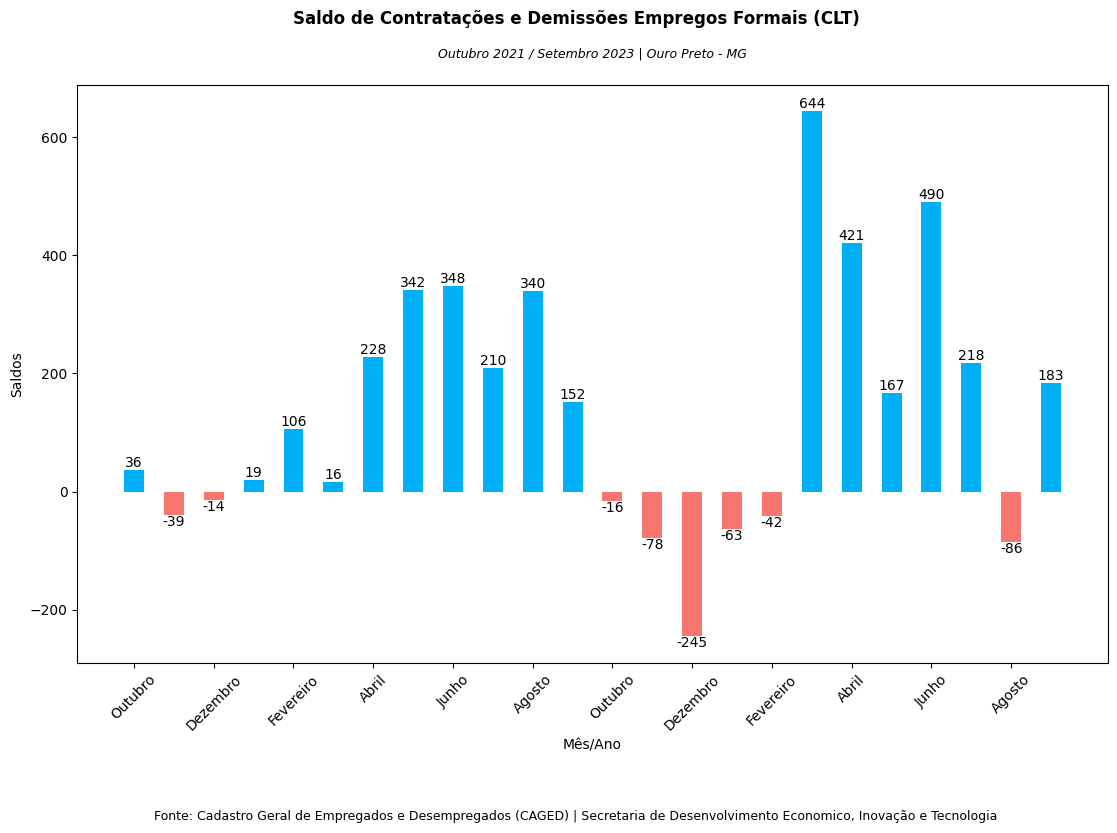

In [ ]:
# Gráfico Saldo de Contratações e Demissões Empregos Formais CLT

# Ajustando as cores com base nos valores
colors = ['#00B0F6' if valor >= 0 else '#F8766D' for valor in saldos_filtrados['Mg-Ouro Preto']]

# Criando o gráfico de barras
plt.figure(figsize=(13.3, 7.5))

# Plotando as barras com as cores definidas
barras = plt.bar(range(len(saldos_filtrados)), saldos_filtrados['Mg-Ouro Preto'], color=colors, width=0.5)

# Adicionando rótulos acima das barras para valores positivos e negativos
for barra in barras:
    height = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom' if height >= 0 else 'top')

# Definindo os rótulos no eixo x a cada dois meses
plt.xticks(range(0, len(saldos_filtrados), 2), saldos_filtrados['mes'][::2], rotation=45)

# Removendo a grade do gráfico
plt.grid(False)

# Ajustes no gráfico
plt.xlabel('Mês/Ano')
plt.ylabel('Saldos')
plt.suptitle("Saldo de Contratações e Demissões Empregos Formais (CLT)", ha='center', fontsize=12, fontweight='bold')
plt.title("Outubro 2021 / Setembro 2023 | Ouro Preto - MG", ha='center', fontsize=9, style='italic', pad=20)
plt.figtext(0.5, -0.1, 'Fonte: Cadastro Geral de Empregados e Desempregados (CAGED) | Secretaria de Desenvolvimento Economico, Inovação e Tecnologia', ha='center', fontsize=9)

# Mostrar o gráfico
plt.show()


Ao analisar o gráfico acima, podemos observar que, este ano, Ouro Preto em termos de criação de empregos, segue com saldo positivo de 1.932 novos posto de trabalho. E quando olhamos para a série nos 2 últimos anos sendo outubro de 2022 a setembro de 2023 registra - se a criação de 3.337 empregos em Ouro Preto e seus distritos.

A tabela 1 sintetiza esses fluxos para os municípios nos Últimos 6 meses.

In [ ]:
# Tabela Variáveis do Mercado de Trabalho Cidades da Região dos Inconfidentes

data = caged.iloc[195:224, :].copy()  # Selecionando as linhas de 195 a 224 e copiando para evitar alterações no DataFrame original

# Renomeando as colunas
data.columns = ['Período', 'Variável', 'Ouro Preto', 'Congonhas', 'Itabirito', 'Mariana', 'Ouro Branco']

# Ajustando o título, subtítulo e fonte
titulo = "<b>Variáveis do Mercado de Trabalho por Municípios Selecionados</b>"
subtitulo = "Abril 2023 / Setembro 2023 | Ouro Preto - MG"
fonte = "*Fonte*: Cadastro Geral de Empregados e Desempregados (CAGED) | Secretaria de Desenvolvimento Econômico, Inovação e Tecnologia"

# Criando a tabela usando Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=data.columns,
                fill_color='grey',
                align='center',
                font=dict(color='white', size=14, family='Arial, sans-serif')),
    cells=dict(values=[data['Período'], data['Variável'], data['Ouro Preto'], data['Congonhas'], data['Itabirito'], data['Mariana'], data['Ouro Branco']],
               fill_color='white',
               align='center',
               font=dict(color='black', size=12, family='Arial, sans-serif')))
])

# Ajustando o layout
fig.update_layout(
    title=dict(text=titulo, x=0.5, font=dict(size=16)),
    annotations=[dict(text=subtitulo, showarrow=False, x=0.5, y=1.1, xref='paper', yref='paper', font=dict(size=12))],
)

# Adicionando fonte como anotação
fig.add_annotation(text=fonte, x=0.5, y=-0.15, showarrow=False, xref='paper', yref='paper', font=dict(size=12))

# Exibindo a tabela
fig.show()


# Relação Anual de Informações Sociais (RAIS)

### Objetivos

A RAIS é um Registro Administrativo, de periodicidade anual, criada com a finalidade de suprir as necessidades de controle, de estatísticas e de informações às entidades governamentais da área social. Constitui um instrumento imprescindível para o cumprimento das normas legais, como também é de fundamental importância para o acompanhamento e a caracterização do mercado de trabalho formal.

### Principais Conceitos:

#### Vínculos empregatícios, número de trabalhadores:

- Entende-se por vínculos empregatícios as relações de emprego, estabelecidas sempre que ocorre trabalho remunerado.

- O número de empregos em determinado período de referência corresponde ao total de vínculos empregatícios efetivados. O número de empregos difere do número de pessoas empregadas, uma vez que o indivíduo pode estar acumulando, na data de referência, mais de um emprego.

#### Trabalhador celetista, avulso, temporário e por prazo determinado:

- O trabalhador celetista é aquele cuja relação de emprego é regida pela CLT, independentemente de o empregador ser do setor público ou privado.

- Trabalhadores avulsos são, conforme definidos em lei: estivadores, alvarengueiros, conferentes de carga ou descarga, vigias portuários, amarradores, trabalhadores avulsos do serviço de bloco, trabalhadores avulsos de capatazia, arrumadores, ensacadores de café, cacau, sal e similares e trabalhadores na indústria de extração do sal, na condição de avulsos, que prestam serviços por meio de sindicatos.

- São definidos como trabalhadores temporários, regidos pela Lei nº 6.019, aqueles que prestam trabalho a uma empresa para atender à necessidade transitória de substituição de seu pessoal regular e permanente, ou ao acréscimo extraordinário de serviço.

- Trabalhadores por prazo determinado, regidos pela Lei nº 0.601, são aqueles que podem ser contratados por um período máximo de dois anos, desde que esse tipo de contrato tenha sido previsto em convenção ou em acordo coletivo.

### Estabelecimento:

O levantamento da RAIS é feito em nível de estabelecimento, considerando-se como tal as unidades de cada empresa separadas espacialmente, ou seja, com endereços distintos.

#### Tamanho do estabelecimento:

O tamanho do estabelecimento é determinado pelo número de empregos nele existente em 31 de dezembro do ano-base. Os estabelecimentos do tamanho zero são aqueles que, apesar de não possuírem empregados em 31 de dezembro, tiveram pelo menos um empregado ao longo do ano.

#### Faixa etária:

O enquadramento dos vínculos na faixa etária considera os anos completos em 31 de dezembro.

#### Admissão e desligamento:

- Os conceitos de admissão e desligamento utilizados na RAIS referem-se também às transferências de empregados, de um estabelecimento para outro, da mesma empresa.

- Por admissão entende-se toda entrada de trabalhador no estabelecimento no ano, qualquer que seja sua origem e, por desligamento, toda saída de pessoa cuja relação de emprego com o estabelecimento cessou durante o ano por qualquer motivo (demissão, aposentadoria, morte), seja por iniciativa do empregador ou do empregado. As entradas e saídas por transferências aparecem incluídas, respectivamente, nas admissões e nos desligamentos.

#### Remuneração média mensal em salário mínimo:

A remuneração média mensal em salários mínimo é definida como a média aritmética das remunerações individuais no mês de referência, convertidas em salários mínimos, no período vigente do ano-base.

- Integram essa remuneração os salários, ordenados, vencimentos, honorários, vantagens, adicionais, gratificações, etc. Está excluída a remuneração do 13º salário.

#### Massa salarial:

É o resultado do produto entre a remuneração média dos empregados em dezembro e o número de empregos existentes no dia 31 do mesmo mês. Nesse indicador, as informações são fornecidas em salários mínimos vigentes na época.

### Informações dos Estabelecimentos

A RAIS, a partir do ano base 2006, vem captando informações segundo o novo código de Atividade Econômica - CNAE 2.0. No intuito de manter a continuidade da série histórica, o MTE permanece divulgando as informações estatísticas segundo a CNAE 1.0, a partir da adoção da Tábua de Conversão da CNAE 2.0 para a CNAE 1.0. Entretanto, devido à existência de variações significativas em nível de classe e grupo em algumas situações, e seguindo as normas internacionais que recomendam a compatibilização em nível de dois dígitos, estão disponíveis a partir da RAIS/2006, segundo a CNAE 1.0, apenas as desagregações em níveis de Divisão e Seção. Tais informações também são compatibilizadas ao código IBGE de 1980, com o intuito de preservar estudos que envolvam séries históricas. É importante assinalar que a maior agregação sugerida pelo MTE vai até aos 26 subsetores da economia.

#### Alguns Indicadores Disponíveis

Total dos estabelecimentos existentes em 31/12, segundo:

Estoque (quantidade de empregos em 31/12 )
Atividade econômica
Natureza jurídica
Tamanho do estabelecimento
Nível geográfico

#### Informações dos Empregados

As informações mais relevantes sobre o empregado são:

- Faixa etária
- Grau de instrução
- Gênero
- Ocupação
- Remuneração média
- Tipo de vínculo (celetista, estatutário, temporário e avulso)
- Nacionalidade
- Tempo de serviço
- Tipo de admissão
- Causa do desligamento

### Alguns Indicadores Disponíveis

- Número de empregados em 31 de dezembro, segundo faixa etária, escolaridade e gênero por nível geográfico, setorial e ocupacional.

- Número de empregados por tamanho de estabelecimento, segundo setor de atividade econômica.

- A remuneração média dos empregos em 31 de dezembro, segundo ocupação e setor de atividade econômica por nível geográfico.


In [ ]:
%%capture

# Carregando os arquivos CSV
file_paths = [
    '/content/drive/Shareddrives/Dados/Caged/outubro_2022.csv',
    '/content/drive/Shareddrives/Dados/Caged/novembro_2022.csv',
    '/content/drive/Shareddrives/Dados/Caged/dezembro_2022.csv',
    '/content/drive/Shareddrives/Dados/Caged/janeiro_2023.csv',
    '/content/drive/Shareddrives/Dados/Caged/fevereiro_2023.csv',
    '/content/drive/Shareddrives/Dados/Caged/marco_2023.csv',
    '/content/drive/Shareddrives/Dados/Caged/abril_2023.csv',
    '/content/drive/Shareddrives/Dados/Caged/maio_2023.csv',
    '/content/drive/Shareddrives/Dados/Caged/junho_2023.csv',
    '/content/drive/Shareddrives/Dados/Caged/julho_2023.csv',
    '/content/drive/Shareddrives/Dados/Caged/agosto_2023.csv',
    '/content/drive/Shareddrives/Dados/Caged/setembro_2023.csv'
]

dfs = []  # Lista para armazenar os DataFrames de cada arquivo

for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Agregando todos os DataFrames em um único DataFrame
df = pd.concat(dfs, ignore_index=True)

# Convertendo a coluna 'competênciamov' para o formato de data
df['competênciamov'] = pd.to_datetime(df['competênciamov'], format='%Y%m')

# Agora você pode usar o DataFrame 'df' com todos os dados combinados
df

In [ ]:
# Função para aplicar os critérios e definir o valor da nova coluna 'setor'
def definir_setor(row):
    if row['seção'] == 'A':
        return 'Agricultura'
    elif row['seção'] in ['B', 'C', 'D', 'E']:
        return 'Indústria'
    elif row['seção'] == 'F':
        return 'Construção'
    elif row['seção'] == 'G':
        return 'Comércio'
    else:
        return 'Serviços'

# Aplicar a função usando apply para criar a nova coluna 'setor'
df['setor'] = df.apply(definir_setor, axis=1)

# Selecionando as colunas e filtrando os valores
selected_columns = [
    'seção', 'saldomovimentação', 'graudeinstrução', 'idade', 'raçacor',
    'sexo', 'salário', 'indicadoraprendiz', 'valorsaláriofixo', 'competênciamov', 'setor']

dados = df[selected_columns][df['valorsaláriofixo'] < 20000]

def aplicar_mapeamentos(dados, colunas_mapeamento):
    for coluna, mapeamento in colunas_mapeamento.items():
        if coluna in df.columns:
            dados[coluna] = dados[coluna].astype(str)  # Garantir que a coluna seja do tipo string
            dados[coluna].replace(mapeamento, inplace=True)

# Dicionário de mapeamentos
colunas_mapeamento = {
    'seção': {
        'A': 'Agricultura, Pecuária e Serviços Relacionados',
        'B': 'Indústia Extrativa',
        'C': 'Indústria e Transformação',
        'D': 'Eletricidade e Gás',
        'E': 'Água, Esgoto, Atividades de Gestão de Resíduos e Descontaminação',
        'F': 'Construção',
        'G': 'Comércio, Reparação de Veículos e Motocicletas',
        'H': 'Transporte, Armazenagem e Correio',
        'I': 'Alojamento e Alimentação',
        'J': 'Informação e Comunicação',
        'K': 'Atividades Finaceiras, de Seguros e Serviços Relacionados',
        'L': 'Atividades Imobiliárias',
        'M': 'Atividades Profissionais, Científicas e Técnicas',
        'N': 'Atividade Administrativas e Serviços Complementares',
        'O': 'Administração Pública, Defesa e Seguridade Social',
        'P': 'Educação',
        'Q': 'Saúde Humana e Serviços Sociais',
        'R': 'Artes, Cultura, Esporte e Recreação',
        'S': 'Outras Atividades de Serviços',
        'T': 'Serviços Domésticos',
        'U': 'Organismos Internacionais e Outras Instituições Extraterritoriais'
    },
    'graudeinstrução': {
        '1': 'Analfabeto',
        '2': 'Até 5º Incompleto',
        '3': '5º Completo Fundamental',
        '4': '6º a 9 Fundamentalº',
        '5': 'Fundamental Completo',
        '6': 'Médio Incompleto',
        '7': 'Médio Completo',
        '8': 'Superior Incompleto',
        '9': 'Superior Completo',
        '10': 'Mestrado',
        '11': 'Doutorado',
        '80': 'Pós-graduação completa'
    },
    'raçacor': {
        '1': 'Branca',
        '2': 'Preta',
        '3': 'Parda',
        '4': 'Amarela',
        '5': 'Indígena',
        '6': 'Não informada',
        '9': 'Não identificado'
    },
    'indicadoraprendiz': {
        '0': 'Não aprendiz',
        '1': 'Aprendiz'
    },
    'sexo': {
        '1': 'Homem',
        '3': 'Mulher'
}}

# Aplicar os mapeamentos
aplicar_mapeamentos(dados, colunas_mapeamento)
dados

,seção,saldomovimentação,graudeinstrução,idade,raçacor,sexo,salário,indicadoraprendiz,valorsaláriofixo,competênciamov,setor
0,Construção,-1,6º a 9 Fundamentalº,36.0,Parda,Homem,1776.9900,Não aprendiz,1776.9900,2022-11-01,Construção
1,Indústria e Transformação,1,Médio Completo,33.0,Branca,Homem,1845.0000,Não aprendiz,1845.0000,2022-11-01,Indústria
2,Construção,1,Médio Completo,26.0,Parda,Homem,1700.0000,Não aprendiz,1700.0000,2022-11-01,Construção
3,"Comércio, Reparação de Veículos e Motocicletas",-1,Superior Completo,54.0,Parda,Mulher,1784.0000,Não aprendiz,1784.0000,2022-11-01,Comércio
4,Construção,1,Médio Completo,43.0,Não informada,Homem,3325.4600,Não aprendiz,3325.4600,2022-11-01,Construção
...,...,...,...,...,...,...,...,...,...,...,...
21565,Construção,-1,6º a 9 Fundamentalº,29.0,Branca,Homem,1449.0000,Não aprendiz,1449.0000,2023-09-01,Construção
21566,Indústria e Transformação,1,Médio Completo,22.0,Parda,Homem,2200.0000,Não aprendiz,2200.0000,2023-09-01,Indústria
21567,"Comércio, Reparação de Veículos e Motocicletas",-1,Médio Completo,29.0,Branca,Mulher,1333.2000,Não aprendiz,6.0600,2023-09-01,Comércio
21568,Construção,1,Médio Completo,42.0,Branca,Mulher,2458.6599,Não aprendiz,2458.6599,2023-09-01,Construção


## Microdados

O Ministério 	do Trabalho 	e Previdência, 	via PDET 	(Programa de 	Disseminação das 	Estatísticas do Trabalho), também disponibiliza os microdados relacionados as 	movimentações (contratações e 	demissões) no 	mercado de 	trabalho formal.

Microdados pode ser 	entendido como o dado em seu menor nível de desagregação. Ou 	seja, cada registro 	de admissão 	ou demissão 	no mercado 	de trabalho, 	de cada 	estabelecimento, é 	registrado com uma desagregação mais ampla. Por exemplo, se houve demissão ou admissão de um trabalhador, esse registro será feito detalhadamente: sexo, idade, município, estado, raca ou cor, escolaridade, setor da economia, se é aprendiz ou não, horas trabalhadas, entre outras informações de natureza social e trabalhista.

Este relatório aspira expandir nossas análises ao incorporar uma parte dos microdados disponíveis. A tabela abaixo apresenta as movimentações ocorridas no mês de julho, segmentadas por setor e nível de escolaridade, no município de Ouro Preto.

### Saldo

In [ ]:
# Tabela Saldo por Setore da Economia e Escolaridade

# Filtrando para o mês de setembro de 2023
saldo_movimentacao_tabela2 = dados[dados['competênciamov'] == "2023-09-01"]

# Agrupando por 'setor' e 'graudeinstrução' e calculando o saldo
saldo_movimentacao_tabela2 = saldo_movimentacao_tabela2.groupby(['setor', 'graudeinstrução'])['saldomovimentação'].sum().reset_index()

# Pivotar os dados
saldo_movimentacao_tabela2 = saldo_movimentacao_tabela2.pivot(index='graudeinstrução', columns='setor', values='saldomovimentação')

# Calculando as somas por setor e adicionando a linha de saldo total
saldo_movimentacao_tabela2.loc['*Saldo*'] = [
    saldo_movimentacao_tabela2['Agricultura'].sum(),
    saldo_movimentacao_tabela2['Comércio'].sum(),
    saldo_movimentacao_tabela2['Construção'].sum(),
    saldo_movimentacao_tabela2['Indústria'].sum(),
    saldo_movimentacao_tabela2['Serviços'].sum()
]

# Criando a tabela usando Plotly
fig = go.Figure(data=[go.Table(
    header=dict(values=['Escolaridade'] + list(saldo_movimentacao_tabela2.columns),
                fill_color='grey',
                align='center',
                font=dict(color='white', size=14, family='Arial, sans-serif')),
    cells=dict(values=[saldo_movimentacao_tabela2.index] + [saldo_movimentacao_tabela2[col] for col in saldo_movimentacao_tabela2.columns],
               fill_color='white',
               align='center',
               font=dict(color='black', size=12, family='Arial, sans-serif')))
])

# Ajustando o layout
fig.update_layout(
    title=dict(text="<b>Saldo por Setores da Economia e Escolaridade</b>", x=0.5, font=dict(size=16)),
    annotations=[dict(text="Setembro 2023 | Ouro Preto - MG", showarrow=False, x=0.5, y= 1.1, xref='paper', yref='paper', font=dict(size=12))],
)

# Adicionando fonte como anotação
fig.add_annotation(text="*Fonte*: Cadastro Geral de Empregados e Desempregados (CAGED) | Secretaria de Desenvolvimento Econômico, Inovação e Tecnologia",
                   x=0.5, y=-0.15, showarrow=False, xref='paper', yref='paper', font=dict(size=12))

# Exibir a tabela
fig.show()


In [ ]:
%%capture

# Filtrando para o mês corrente
saldo_movimentacao_mensal = dados[dados['competênciamov'] == "2023-09-01"]

# Agrupando por setor e grau de instrução, e calculando o saldo
saldo_movimentacao_mensal = saldo_movimentacao_mensal.groupby(['setor', 'graudeinstrução']).agg(saldo=('saldomovimentação', 'sum')).reset_index()

# Verificando o resultado
print(saldo_movimentacao_mensal)


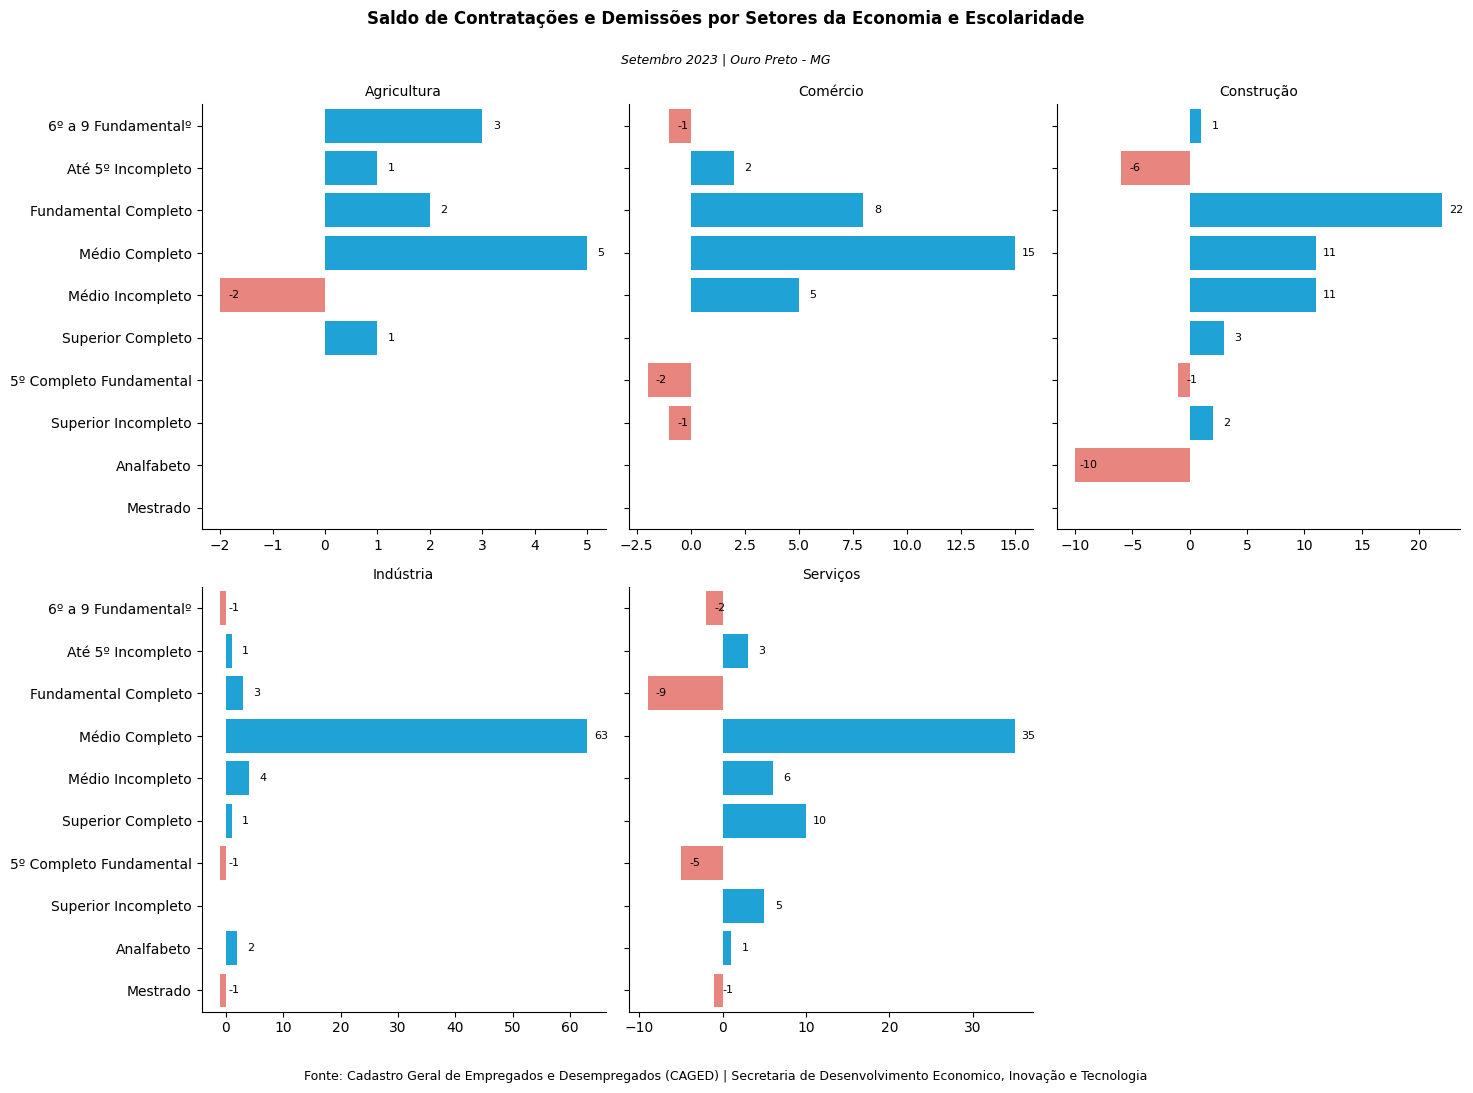

In [ ]:
# Gráfico Saldo de Contratações e Demissões por Setores da Economia e Escolaridade

# Adicionando uma coluna 'saldo_negativo' ao DataFrame
saldo_movimentacao_mensal['saldo_negativo'] = saldo_movimentacao_mensal['saldo'] < 0

# Mapeamento de cores para preenchimento
colors = {True: '#F8766D', False: '#00B0F6'}

# Criando a grade de gráficos
g = sns.FacetGrid(saldo_movimentacao_mensal, col="setor", col_wrap=3, height=5, sharex=False)
g.map_dataframe(sns.barplot, y='graudeinstrução', x='saldo', hue='saldo_negativo', palette=colors)

# Adicionando rótulos
for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_width() != 0:
            ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                        ha='center', va='center', xytext=(10, 0), textcoords='offset points', size=8)  # Alterado para size=8

# Personalizando os gráficos na grade
g.set_titles(col_template="{col_name}")
g.set_axis_labels("", "Grau de Instrução")
g.set_xlabels("")
g.set_ylabels("")

# Adicionando títulos
g.fig.suptitle("Saldo de Contratações e Demissões por Setores da Economia e Escolaridade", y=1.06, fontsize=12, fontweight='bold')
g.fig.text(0.5, 1.01, "Setembro 2023 | Ouro Preto - MG", ha='center', va='center', fontsize=9, style='italic', color='black')
plt.figtext(0.5, -0.01, 'Fonte: Cadastro Geral de Empregados e Desempregados (CAGED) | Secretaria de Desenvolvimento Economico, Inovação e Tecnologia', ha='center', fontsize=9)

plt.show()


### Finanças

In [ ]:
%%capture

# Agrupando por data e calculando a média do valor salário fixo
microdados_salario_geral = dados.groupby('competênciamov')['valorsaláriofixo'].agg(rendimento_medio=('mean')).reset_index()

print(microdados_salario_geral)


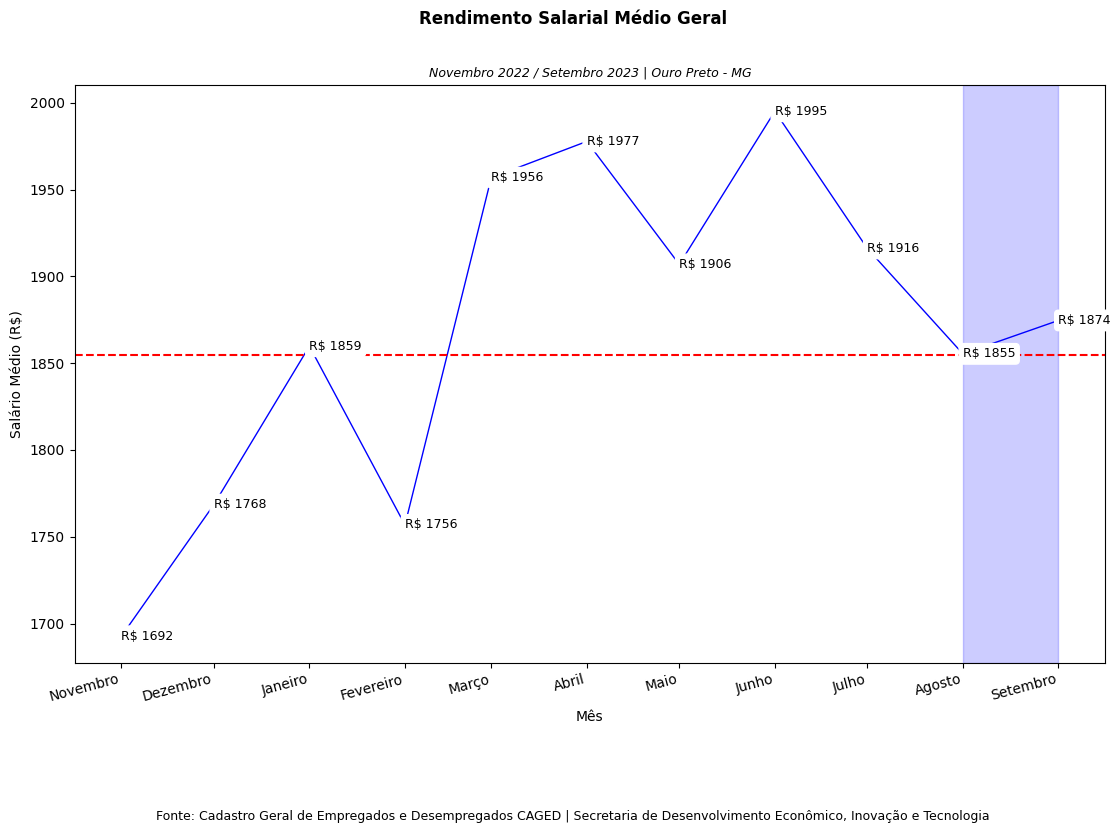

In [ ]:
# Gráfico Rendimendo Médio Geral

# Criando um gráfico de linha com tamanho específico
plt.figure(figsize=(13.3, 7.5))
sns.lineplot(data=microdados_salario_geral, x='competênciamov', y='rendimento_medio', color='blue', label='Rendimento Médio', linewidth=1)

# Adicionando uma linha horizontal
plt.axhline(y=1855, color='red', linestyle='--', label='R$ 1855')

# Adicionando uma faixa destacada entre junho e setembro de 2023
plt.axvspan(pd.to_datetime('2023-08-01'), pd.to_datetime('2023-09-01'), color='blue', alpha=0.2)

# Adicionando pontos com rótulos em cada mês
for index, row in microdados_salario_geral.iterrows():
    plt.scatter(row['competênciamov'], row['rendimento_medio'], color='black', s=20)
    plt.text(row['competênciamov'], row['rendimento_medio'], f'R$ {int(row["rendimento_medio"])}',
             ha='left', va='center', fontsize=9, color='black', bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))

# Mapeando nomes de meses em inglês para português
traducao_meses = {
    'January': 'Janeiro',
    'February': 'Fevereiro',
    'March': 'Março',
    'April': 'Abril',
    'May': 'Maio',
    'June': 'Junho',
    'July': 'Julho',
    'August': 'Agosto',
    'September': 'Setembro',
    'October': 'Outubro',
    'November': 'Novembro',
    'December': 'Dezembro'
}

# Formatando o eixo x para mostrar apenas o nome do mês em português
meses_portugues = [traducao_meses[month_name[data.month]] for data in microdados_salario_geral['competênciamov']]
plt.xticks(microdados_salario_geral['competênciamov'], meses_portugues, rotation=15, ha='right')

# Ajustes no título, subtítulo, legenda
plt.suptitle("Rendimento Salarial Médio Geral", ha='center', fontsize=12, fontweight='bold')
plt.title("Novembro 2022 / Setembro 2023 | Ouro Preto - MG", ha='center', fontsize=9, style='italic')
plt.xlabel("Mês")
plt.ylabel("Salário Médio (R$)")
plt.legend().set_visible(False)  # Ocultar a legenda

# Adicionando fonte
plt.figtext(0.5, -0.1, "Fonte: Cadastro Geral de Empregados e Desempregados CAGED | "
                      "Secretaria de Desenvolvimento Econômico, Inovação e Tecnologia",
           ha='center', fontsize=9)

# Exibindo o gráfico
plt.show()


In [ ]:
%%capture

# Agrupando por competênciamov e setor, calculando a média do valorsaláriofixo
microdados_salario_setor = dados.groupby(['competênciamov', 'setor'])['valorsaláriofixo'].mean().reset_index()
microdados_salario_setor = microdados_salario_setor.rename(columns={'valorsaláriofixo': 'rendimento_medio'})

# Visualizando os resultados
print(microdados_salario_setor)


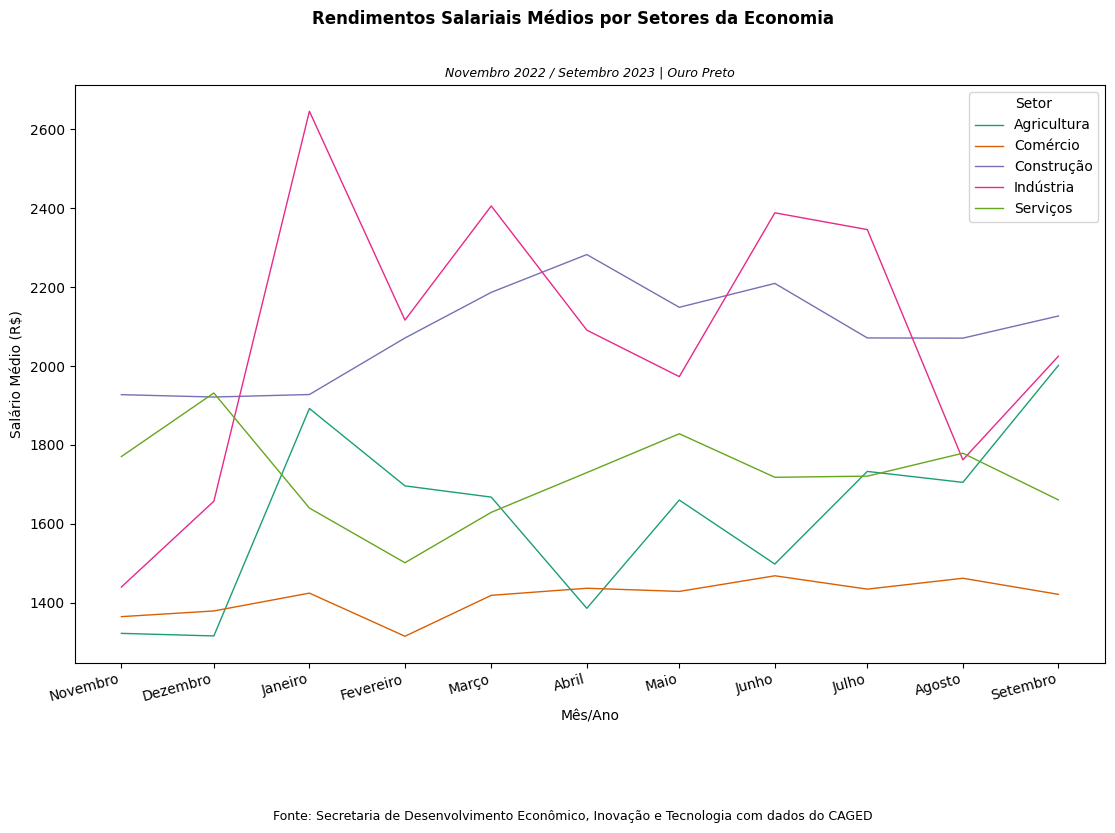

In [ ]:
# Gráfico Rendimentos Salariais Médios por Setores da Economia

# Convertendo a coluna 'competênciamov' para o formato datetime (se necessário)
microdados_salario_setor['competênciamov'] = pd.to_datetime(microdados_salario_setor['competênciamov'])

# Mapeando nomes de meses em inglês para português
traducao_meses = {
    'January': 'Janeiro',
    'February': 'Fevereiro',
    'March': 'Março',
    'April': 'Abril',
    'May': 'Maio',
    'June': 'Junho',
    'July': 'Julho',
    'August': 'Agosto',
    'September': 'Setembro',
    'October': 'Outubro',
    'November': 'Novembro',
    'December': 'Dezembro'
}

# Criando o gráfico de linha
plt.figure(figsize=(13.3, 7.5))
sns.lineplot(data=microdados_salario_setor, x='competênciamov', y='rendimento_medio', hue='setor', palette='Dark2', linewidth=1)

# Formatando o eixo x para mostrar apenas o nome do mês em português
meses_portugues = [traducao_meses[month_name[data.month]] for data in microdados_salario_geral['competênciamov']]
plt.xticks(microdados_salario_geral['competênciamov'], meses_portugues, rotation=15, ha='right')

# Ajustando título, subtítulo, legenda
plt.suptitle("Rendimentos Salariais Médios por Setores da Economia", ha='center', fontsize=12, fontweight='bold')
plt.title("Novembro 2022 / Setembro 2023 | Ouro Preto", ha='center', fontsize=9, style='italic')
plt.xlabel("Mês/Ano")
plt.ylabel("Salário Médio (R$)")
plt.legend(title="Setor")

# Adicionando fonte
plt.figtext(0.5, -0.1, "Fonte: Secretaria de Desenvolvimento Econômico, Inovação e Tecnologia com dados do CAGED",
           ha='center', fontsize=9)

# Exibindo o gráfico
plt.show()


In [ ]:
%%capture

# Agrupando por competênciamov e setor, calculando a média do valorsaláriofixo
microdados_salario_sexo = dados.groupby(['competênciamov', 'sexo'])['valorsaláriofixo'].mean().reset_index()
microdados_salario_sexo = microdados_salario_sexo.rename(columns={'valorsaláriofixo': 'rendimento_medio'})

# Visualizando os resultados
print(microdados_salario_sexo)


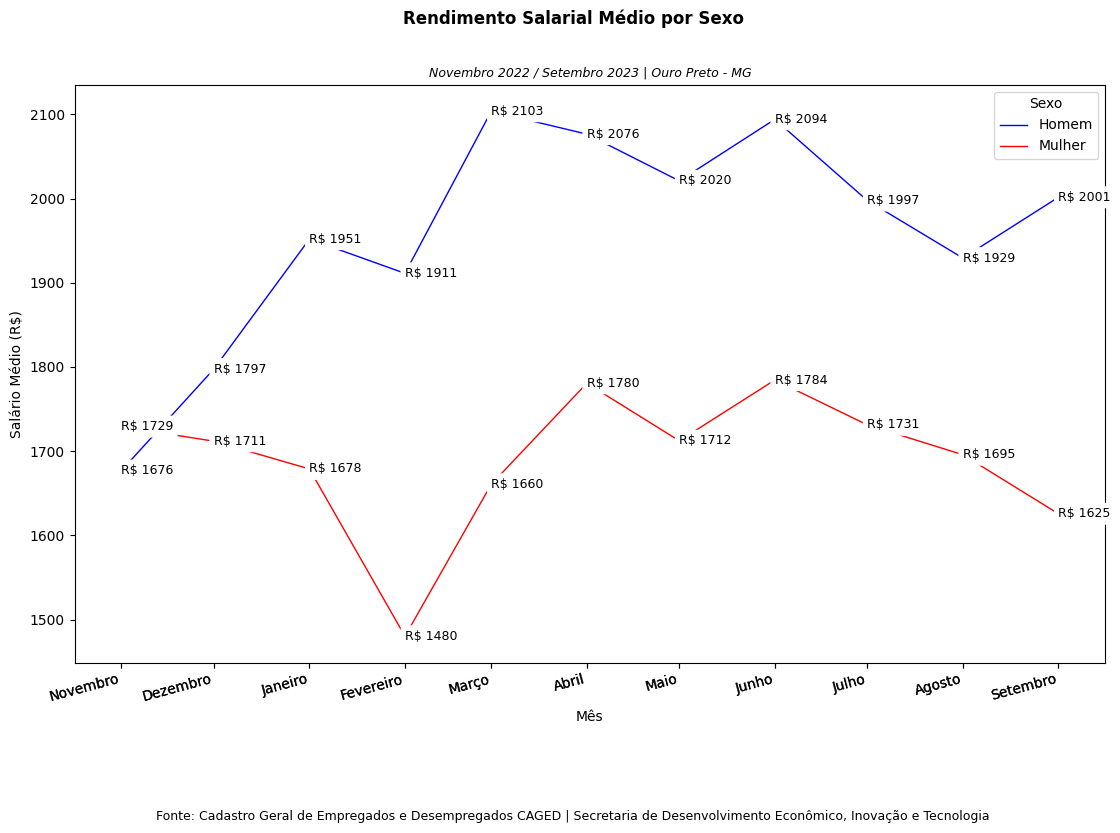

In [ ]:
# Gráfico Rendimendo Salarial Médio por Sexo

# Criando um gráfico de linha com tamanho específico
plt.figure(figsize=(13.3, 7.5))
# Gráfico de linha para Homem (azul)
sns.lineplot(data=microdados_salario_sexo, x='competênciamov', y='rendimento_medio', hue='sexo', palette=['blue', 'red'], linewidth=1)

# Adicionando pontos com rótulos em cada mês
for index, row in microdados_salario_sexo.iterrows():
    plt.scatter(row['competênciamov'], row['rendimento_medio'], color='black', s=20)
    plt.text(row['competênciamov'], row['rendimento_medio'], f'R$ {int(row["rendimento_medio"])}',
             ha='left', va='center', fontsize=9, color='black', bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.3'))

# Mapeando nomes de meses em inglês para português
traducao_meses = {
    'January': 'Janeiro',
    'February': 'Fevereiro',
    'March': 'Março',
    'April': 'Abril',
    'May': 'Maio',
    'June': 'Junho',
    'July': 'Julho',
    'August': 'Agosto',
    'September': 'Setembro',
    'October': 'Outubro',
    'November': 'Novembro',
    'December': 'Dezembro'
}

# Formatando o eixo x para mostrar apenas o nome do mês em português
meses_portugues = [traducao_meses[month_name[data.month]] for data in microdados_salario_sexo['competênciamov']]
plt.xticks(microdados_salario_sexo['competênciamov'], meses_portugues, rotation=15, ha='right')

# Ajustes no título, subtítulo, legenda
plt.suptitle("Rendimento Salarial Médio por Sexo", ha='center', fontsize=12, fontweight='bold')
plt.title("Novembro 2022 / Setembro 2023 | Ouro Preto - MG", ha='center', fontsize=9, style='italic')
plt.xlabel("Mês")
plt.ylabel("Salário Médio (R$)")
plt.legend(title="Sexo")


# Adicionando fonte
plt.figtext(0.5, -0.1, "Fonte: Cadastro Geral de Empregados e Desempregados CAGED | "
                      "Secretaria de Desenvolvimento Econômico, Inovação e Tecnologia",
           ha='center', fontsize=9)

# Exibindo o gráfico
plt.show()


In [ ]:
%%capture

# Filtrando para o mês corrente
microdados_caged_current_month = dados[dados['competênciamov'] == "2023-09-01"]

# Agrupando por setor e saldomovimentação, calculando a média do valorsaláriofixo
rendimento_medio_adm_des = microdados_caged_current_month.groupby(['setor', 'saldomovimentação'])['valorsaláriofixo'].mean().reset_index()

# Mapeando valores de saldomovimentação para 'Admissão' e 'Desligamento'
rendimento_medio_adm_des['saldomovimentação'] = rendimento_medio_adm_des['saldomovimentação'].apply(lambda x: 'Admissão' if x == 1 else 'Desligamento')

# Renomeando a coluna de rendimento
rendimento_medio_adm_des = rendimento_medio_adm_des.rename(columns={'valorsaláriofixo': 'rendimento'})

# Visualizando os resultados
print(rendimento_medio_adm_des)


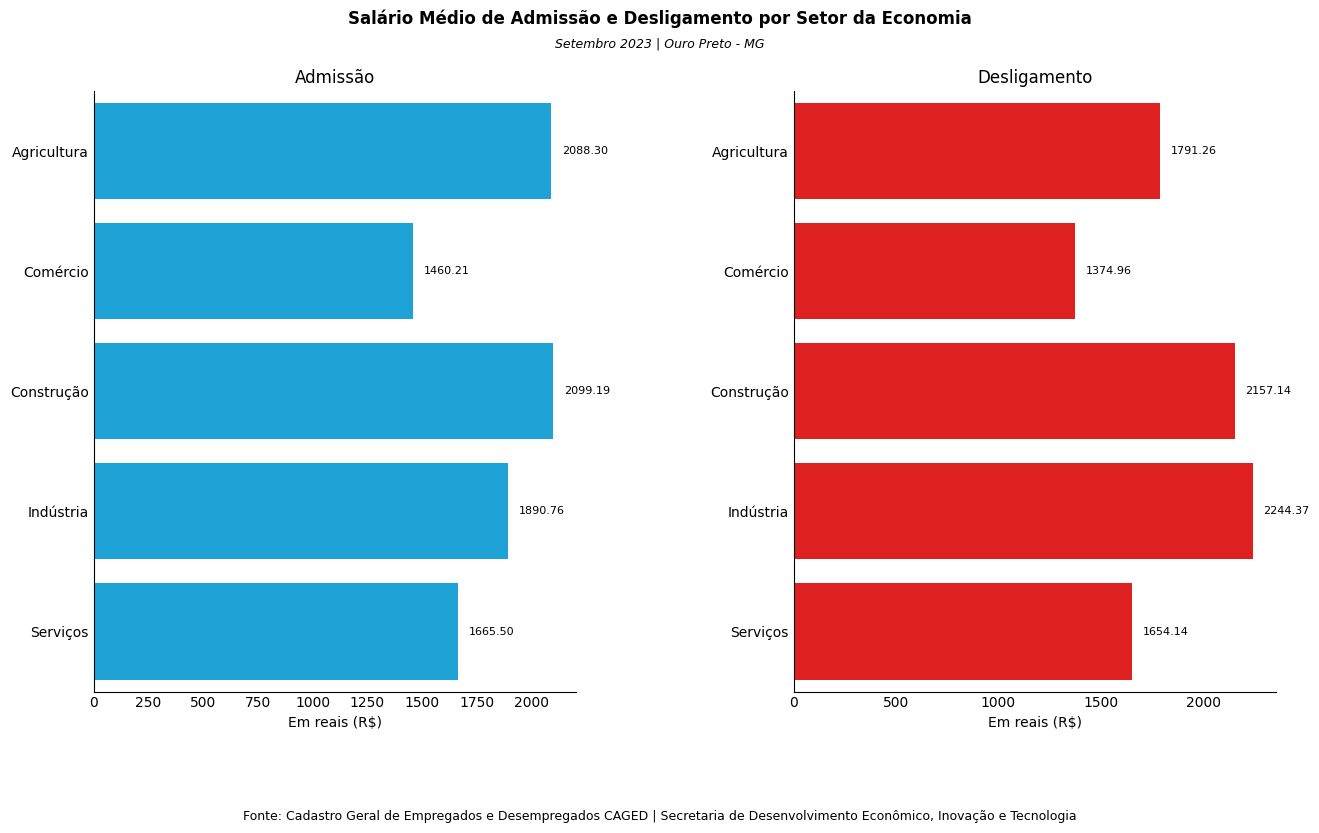

In [ ]:
# Gráfico Salário Médio de Admissão e Desligamento por Setor da Economia

# Separando os dados para desligamento e admissão
dados_desligamento = rendimento_medio_adm_des[rendimento_medio_adm_des['saldomovimentação'] == 'Desligamento']
dados_admissao = rendimento_medio_adm_des[rendimento_medio_adm_des['saldomovimentação'] == 'Admissão']

# Criando gráficos separados
fig, axes = plt.subplots(1, 2, figsize=(13.3, 7.5))

# Gráfico para Admissão
sns.barplot(x='rendimento', y='setor', data=dados_admissao, color='#00B0F6', ax=axes[0])
axes[0].set_title('Admissão')
axes[0].set_xlabel('Em reais (R$)')
axes[0].set_ylabel('')

# Adicionando rótulos às barras de Admissão
for p in axes[0].patches:
    width = p.get_width()
    axes[0].text(width + 50, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8)

# Gráfico para Desligamento
sns.barplot(x='rendimento', y='setor', data=dados_desligamento, color='#FF0000', ax=axes[1])
axes[1].set_title('Desligamento')
axes[1].set_xlabel('Em reais (R$)')
axes[1].set_ylabel('')

# Adicionando rótulos às barras de Desligamento
for p in axes[1].patches:
    width = p.get_width()
    axes[1].text(width + 50, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=8)

# Removendo linhas de borda
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    ax.tick_params(axis='both', which='both', length=0)

# Ajustes no título, subtítulo, legenda
plt.suptitle("Salário Médio de Admissão e Desligamento por Setor da Economia", ha='center', fontsize=12, fontweight='bold')
plt.text(0.5, 0.93, "Setembro 2023 | Ouro Preto - MG", ha='center', fontsize=9, style='italic', transform=fig.transFigure)
plt.xlabel("Em reais (R$)")
plt.ylabel('')

# Adicionando fonte
plt.figtext(0.5, -0.10, "Fonte: Cadastro Geral de Empregados e Desempregados CAGED | "
                      "Secretaria de Desenvolvimento Econômico, Inovação e Tecnologia",
           ha='center', fontsize=9)

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()


In [ ]:
%%capture

# Filtrando as linhas onde a coluna "idade" não é NaN
microdados_caged_filtrado = dados.dropna(subset=['idade'])

# Agrupando por setor e idade, calculando o saldo
movimentacao_jovem = microdados_caged_filtrado.groupby(['setor', pd.cut(microdados_caged_filtrado['idade'], bins=[0, 24, float('inf')], labels=['Jovem', 'Não Jovem'])])['saldomovimentação'].sum().reset_index()

# Renomeando a coluna de idade
movimentacao_jovem = movimentacao_jovem.rename(columns={'idade': 'idade_grupo'})

# Agrupando novamente por setor e idade_grupo, calculando o saldo final
movimentacao_jovem = movimentacao_jovem.groupby(['setor', 'idade_grupo'])['saldomovimentação'].sum().reset_index()

# Visualizando os resultados
print(movimentacao_jovem)


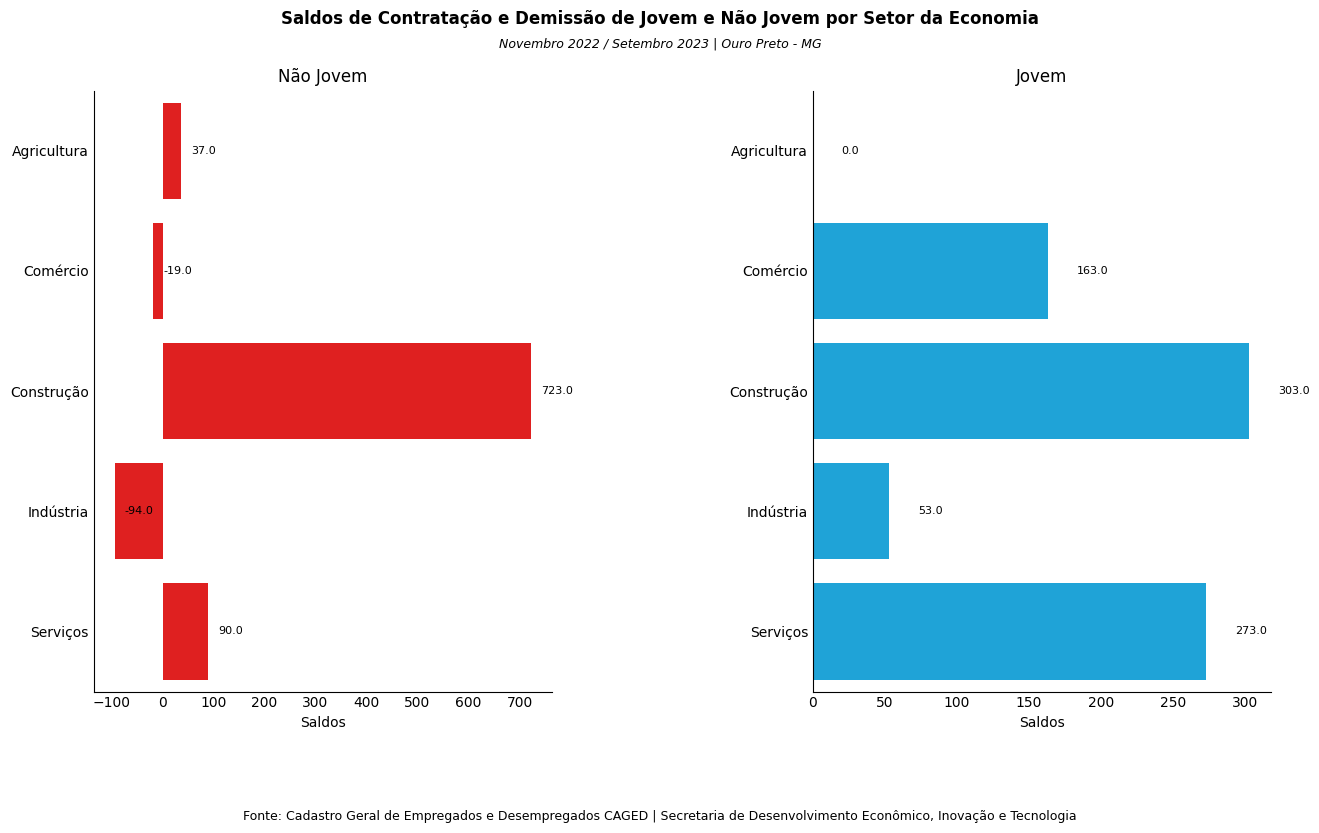

In [ ]:
# Gráfico Saldos de Contratação e Demissão de Jovem e Não Jovem por Setor da Economia

# Criando gráficos separados
fig, axes = plt.subplots(1, 2, figsize=(13.3, 7.5))

# Gráfico para Não Jovem
sns.barplot(x='saldomovimentação', y='setor', data=movimentacao_jovem[movimentacao_jovem['idade_grupo'] == 'Não Jovem'], color='#FF0000', ax=axes[0])
axes[0].set_title('Não Jovem')
axes[0].set_xlabel('Saldos')
axes[0].set_ylabel('')

# Adicionando rótulos às barras de Não Jovem
for p in axes[0].patches:
    width = p.get_width()
    axes[0].text(width + 20, p.get_y() + p.get_height() / 2, f'{width}', ha='left', va='center', fontsize=8)

# Gráfico para Jovem
sns.barplot(x='saldomovimentação', y='setor', data=movimentacao_jovem[movimentacao_jovem['idade_grupo'] == 'Jovem'], color='#00B0F6', ax=axes[1])
axes[1].set_title('Jovem')
axes[1].set_xlabel('Saldos')
axes[1].set_ylabel('')

# Adicionando rótulos às barras de Jovem
for p in axes[1].patches:
    width = p.get_width()
    axes[1].text(width + 20, p.get_y() + p.get_height() / 2, f'{width}', ha='left', va='center', fontsize=8)

# Removendo linhas de borda
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    ax.tick_params(axis='both', which='both', length=0)

# Ajustes no título, subtítulo, legenda
plt.suptitle("Saldos de Contratação e Demissão de Jovem e Não Jovem por Setor da Economia", ha='center', fontsize=12, fontweight='bold')
plt.text(0.5, 0.93, "Novembro 2022 / Setembro 2023 | Ouro Preto - MG", ha='center', fontsize=9, style='italic', transform=fig.transFigure)


# Adicionando fonte
plt.figtext(0.5, -0.10, "Fonte: Cadastro Geral de Empregados e Desempregados CAGED | "
                      "Secretaria de Desenvolvimento Econômico, Inovação e Tecnologia",
           ha='center', fontsize=9)

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()


In [ ]:
%%capture

# Agrupando por setor e indicadoraprendiz, calculando a soma do saldomovimentação
saldo_movimentacao_aprendiz = dados.groupby(['setor', 'indicadoraprendiz'])['saldomovimentação'].sum().reset_index()

# Visualizando os resultados
print(saldo_movimentacao_aprendiz)


         setor indicadoraprendiz  saldomovimentação
0  Agricultura      Não aprendiz                 37
1     Comércio          Aprendiz                  5
2     Comércio      Não aprendiz                139
3   Construção          Aprendiz                 -6
4   Construção      Não aprendiz               1031
5    Indústria          Aprendiz                 25
6    Indústria      Não aprendiz                -66
7     Serviços          Aprendiz                  5
8     Serviços      Não aprendiz                358


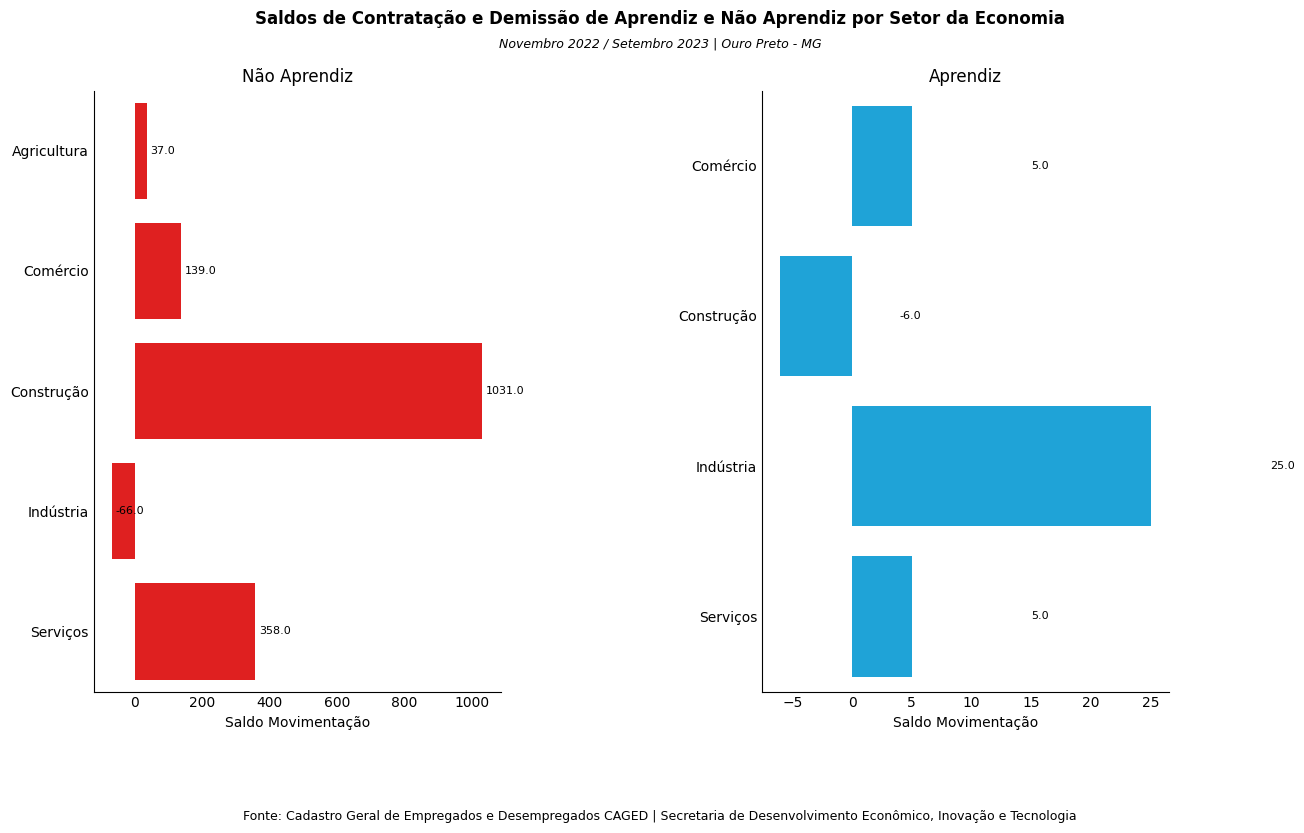

In [ ]:
# Gráfico Saldos de Contratação e Demissão de Aprendiz e Não Aprendiz por Setor da Economia

# Filtrando os dados para Aprendiz e Não Aprendiz
aprendiz = saldo_movimentacao_aprendiz[saldo_movimentacao_aprendiz['indicadoraprendiz'] == 'Aprendiz']
nao_aprendiz = saldo_movimentacao_aprendiz[saldo_movimentacao_aprendiz['indicadoraprendiz'] == 'Não aprendiz']

# Criando gráficos separados
fig, axes = plt.subplots(1, 2, figsize=(13.3, 7.5))

# Gráfico para Não Aprendiz
sns.barplot(x='saldomovimentação', y='setor', data=nao_aprendiz, color='#FF0000', ax=axes[0])
axes[0].set_title('Não Aprendiz')
axes[0].set_xlabel('Saldo Movimentação')
axes[0].set_ylabel('')

# Adicionando rótulos às barras de Não Aprendiz
for p in axes[0].patches:
    width = p.get_width()
    axes[0].text(width + 10, p.get_y() + p.get_height() / 2, f'{width}', ha='left', va='center', fontsize=8)

# Gráfico para Aprendiz
sns.barplot(x='saldomovimentação', y='setor', data=aprendiz, color='#00B0F6', ax=axes[1])
axes[1].set_title('Aprendiz')
axes[1].set_xlabel('Saldo Movimentação')
axes[1].set_ylabel('')

# Adicionando rótulos às barras de Aprendiz
for p in axes[1].patches:
    width = p.get_width()
    axes[1].text(width + 10, p.get_y() + p.get_height() / 2, f'{width}', ha='left', va='center', fontsize=8)

# Removendo linhas de borda
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    ax.tick_params(axis='both', which='both', length=0)

# Ajustes no título, subtítulo, legenda
plt.suptitle("Saldos de Contratação e Demissão de Aprendiz e Não Aprendiz por Setor da Economia", ha='center', fontsize=12, fontweight='bold')
plt.text(0.5, 0.93, "Novembro 2022 / Setembro 2023 | Ouro Preto - MG", ha='center', fontsize=9, style='italic', transform=fig.transFigure)


# Adicionando fonte
plt.figtext(0.5, -0.10, "Fonte: Cadastro Geral de Empregados e Desempregados CAGED | "
                      "Secretaria de Desenvolvimento Econômico, Inovação e Tecnologia",
           ha='center', fontsize=9)

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()
